In [2]:
!pip install -q rfdetr==1.2.1
!pip install -q supervision==0.26.1
!pip install -q roboflow==1.2.2
!pip install -q tensorboard


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
import os
import torch

In [4]:
# Check GPU availability
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"Current device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name()}")
    print(f"Device memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    print("⚠️ GPU not available. Please enable GPU runtime: Runtime > Change runtime type > Hardware accelerator > GPU")

CUDA available: True
Current device: 0
Device name: NVIDIA GeForce RTX 5090
Device memory: 31.4 GB


In [8]:
dataset_location = "/workspace/data"

In [9]:
# Verify dataset structure
if os.path.exists(dataset_location):
    print(f"Dataset found at: {dataset_location}")
    print("Dataset structure:")
    for root, dirs, files in os.walk(dataset_location):
        level = root.replace(dataset_location, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 2 * (level + 1)
        for file in files[:5]:  # Show first 5 files only
            print(f"{subindent}{file}")
        if len(files) > 5:
            print(f"{subindent}... and {len(files)-5} more files")
else:
    print(f"⚠️ Dataset not found at {dataset_location}")
    print("Please upload your dataset using one of the methods above.")

Dataset found at: /workspace/data
Dataset structure:
data/
  Archiv.zip
  valid/
    frame_017857.png
    frame_006782.png
    frame_020751.png
    frame_016585.png
    frame_004630.png
    ... and 1087 more files
  train/
    frame_016591.png
    frame_000495.png
    frame_002282.png
    frame_002296.png
    frame_020989.png
    ... and 8728 more files
  __MACOSX/
    ._valid
    ._train
    ._test
    valid/
      ._frame_017857.png
      ._frame_006782.png
      ._frame_020751.png
      ._frame_016585.png
      ._frame_004630.png
      ... and 1087 more files
    train/
      ._frame_016591.png
      ._frame_000495.png
      ._frame_002282.png
      ._frame_002296.png
      ._frame_020989.png
      ... and 8728 more files
    test/
      ._frame_001953.png
      ._frame_020745.png
      ._frame_019846.png
      ._frame_012907.png
      ._frame_016552.png
      ... and 1088 more files
  test/
    frame_001953.png
    frame_020745.png
    frame_019846.png
    frame_012907.png
    fram

In [10]:
from rfdetr import RFDETRMedium

In [11]:
model = RFDETRMedium()

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


In [13]:
model.train(
    output_dir="/workspace/output",
    dataset_dir=dataset_location,
    epochs=10,              # Increased epochs for better training
    batch_size=16,           # 16 for A100
    grad_accum_steps=1,     # Increased to simulate larger batch size
    lr=1e-3,                # Slightly reduced learning rate
    device="cuda",  # Explicitly set device
)

num_classes mismatch: model has 90 classes, but your dataset has 1 classes
reinitializing your detection head with 1 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir /workspace/output' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=1, grad_accum_steps=1, amp=True, lr=0.001, lr_encoder=0.00015, batch_size=16, weight_decay=0.0001, epochs=10, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-medium.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[3, 6, 9, 12], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=4, dim_feedforward=2048, hidden_dim=256, sa_nheads=8

fatal: not a git repository (or any of the parent directories): .git


Epoch: [0]  [  0/545]  eta: 0:09:51  lr: 0.001000  class_error: 0.00  loss: 11.0365 (11.0365)  loss_ce: 0.7881 (0.7881)  loss_bbox: 0.1476 (0.1476)  loss_giou: 1.2317 (1.2317)  loss_ce_0: 0.7472 (0.7472)  loss_bbox_0: 0.1637 (0.1637)  loss_giou_0: 1.3007 (1.3007)  loss_ce_1: 0.7732 (0.7732)  loss_bbox_1: 0.1649 (0.1649)  loss_giou_1: 1.2497 (1.2497)  loss_ce_2: 0.7971 (0.7971)  loss_bbox_2: 0.1460 (0.1460)  loss_giou_2: 1.1968 (1.1968)  loss_ce_enc: 0.6715 (0.6715)  loss_bbox_enc: 0.1828 (0.1828)  loss_giou_enc: 1.4754 (1.4754)  loss_ce_unscaled: 0.7881 (0.7881)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0295 (0.0295)  loss_giou_unscaled: 0.6158 (0.6158)  cardinality_error_unscaled: 1.6875 (1.6875)  loss_ce_0_unscaled: 0.7472 (0.7472)  loss_bbox_0_unscaled: 0.0327 (0.0327)  loss_giou_0_unscaled: 0.6504 (0.6504)  cardinality_error_0_unscaled: 1.6875 (1.6875)  loss_ce_1_unscaled: 0.7732 (0.7732)  loss_bbox_1_unscaled: 0.0330 (0.0330)  loss_giou_1_unscaled: 0.6249 (0.62

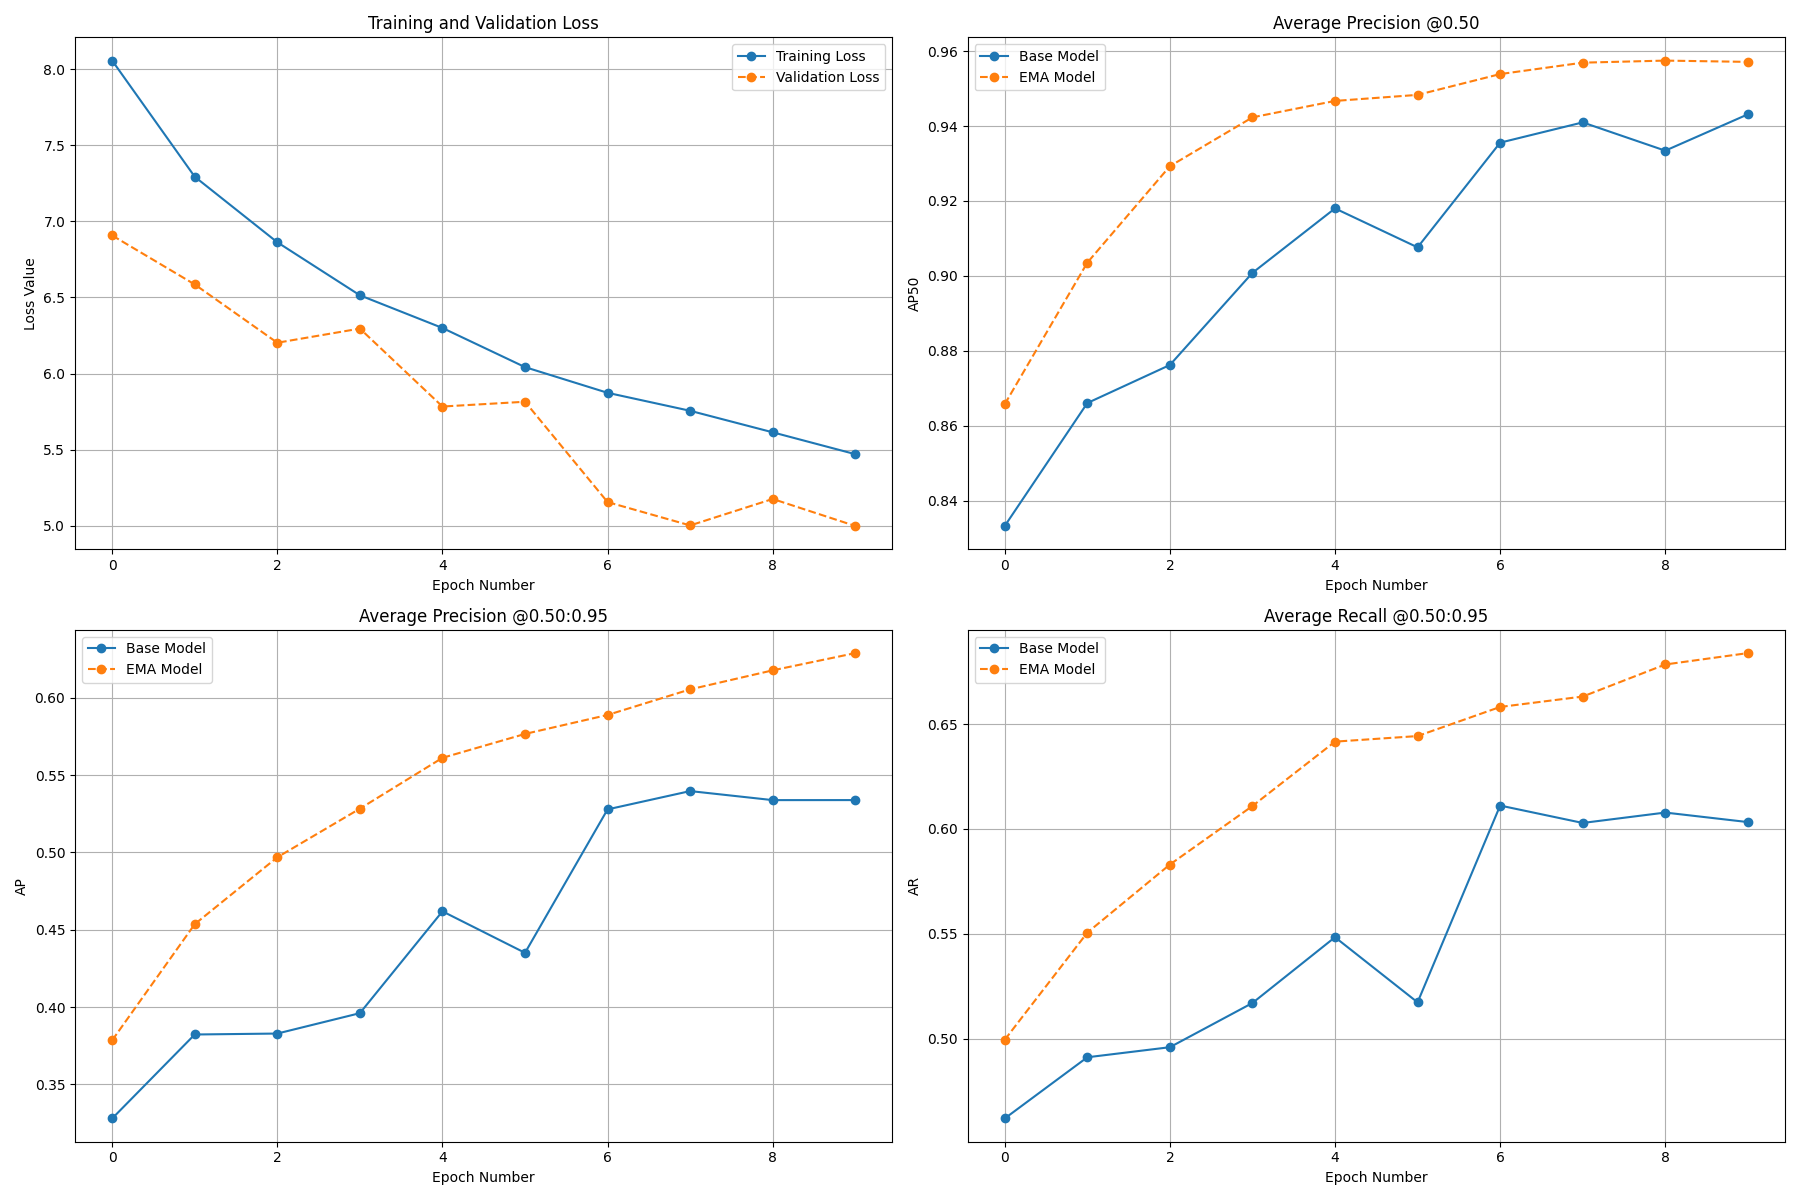

In [15]:
from PIL import Image

Image.open("/workspace/output/metrics_plot.png")

In [16]:
import supervision as sv

ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"{dataset_location}/test",
    annotations_path=f"{dataset_location}/test/_annotations.coco.json",
)

In [17]:
model.optimize_for_inference()

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


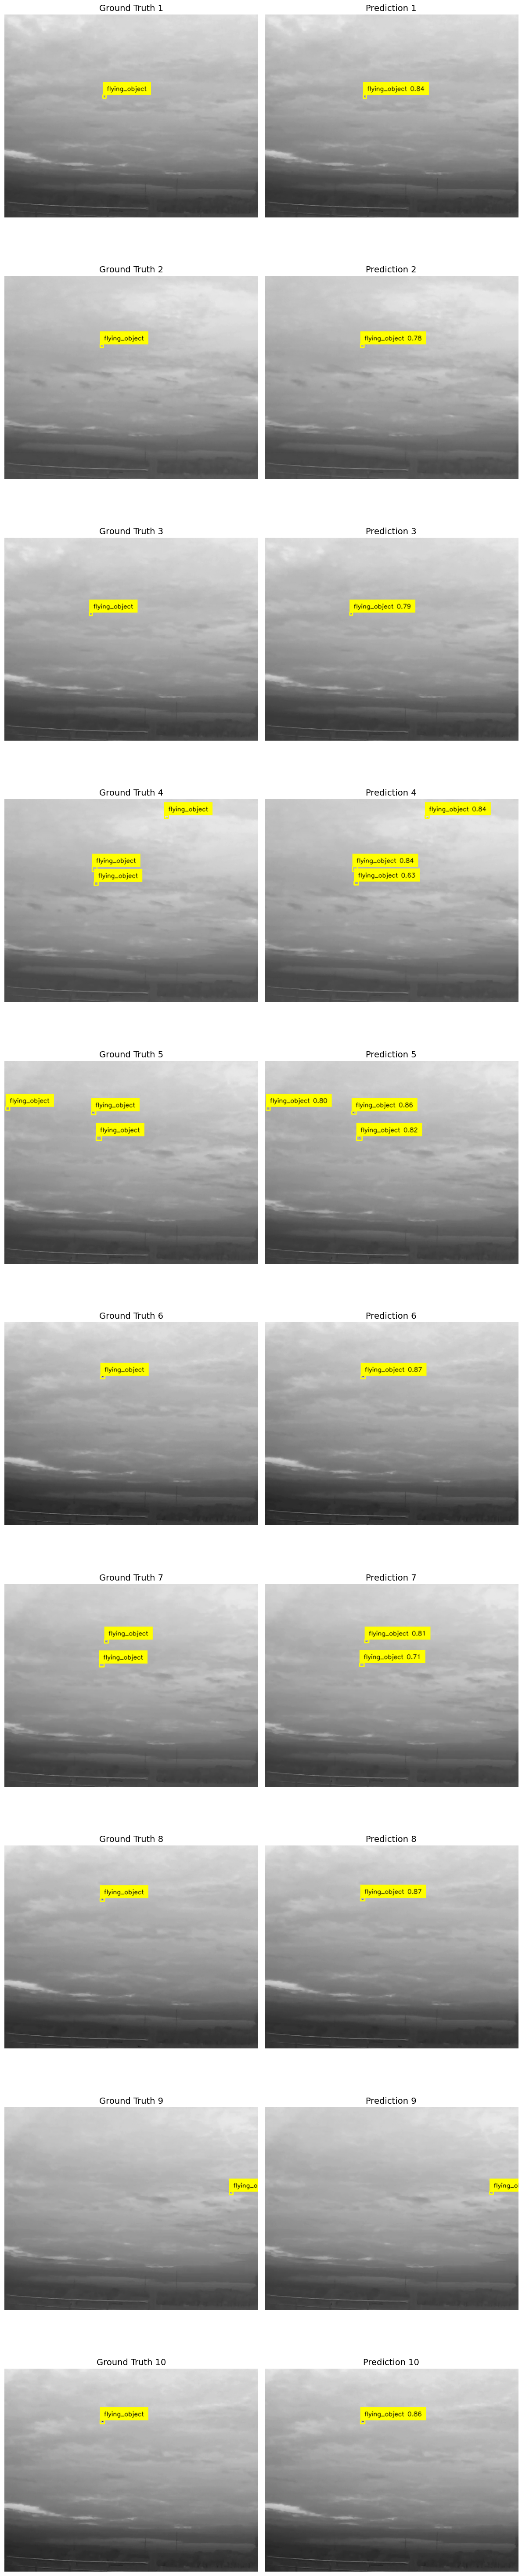

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

images = []
titles = []

# Reduce number of images if needed for speed
num_samples = min(10,len(ds))

for i in range(num_samples):
    path, image, annotations = ds[i]
    image = Image.open(path)

    # Get predictions
    detections = model.predict(image, threshold=0.5)

    # Calculate visualization parameters
    text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
    thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)
    color = sv.ColorPalette.from_hex([
        "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
        "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
    ])

    # Annotators
    bbox_annotator = sv.BoxAnnotator(color=color, thickness=thickness)
    label_annotator = sv.LabelAnnotator(
        color=color,
        text_color=sv.Color.BLACK,
        text_scale=text_scale
    )

    # Labels
    annotations_labels = [f"{ds.classes[class_id]}" for class_id in annotations.class_id]
    detections_labels = [
        f"{ds.classes[class_id]} {confidence:.2f}"
        for class_id, confidence in zip(detections.class_id, detections.confidence)
    ]

    # Annotated images
    annotation_image = bbox_annotator.annotate(image.copy(), annotations)
    annotation_image = label_annotator.annotate(annotation_image, annotations, annotations_labels)

    detections_image = bbox_annotator.annotate(image.copy(), detections)
    detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

    images.extend([annotation_image, detections_image])
    titles.extend([f"Ground Truth {i+1}", f"Prediction {i+1}"])

# Plotting (larger images)
cols = 2
rows = num_samples
fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))  # Increase figsize as needed

if rows == 1:
    axes = [axes]  # Ensure iterable if only one row

for idx, ax in enumerate(axes.flat if isinstance(axes, np.ndarray) else axes):
    ax.imshow(images[idx])
    ax.set_title(titles[idx], fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [23]:
import supervision as sv
from tqdm import tqdm
from supervision.metrics import MeanAveragePrecision

targets = []
predictions = []

for path, image, annotations in tqdm(ds):
    image = Image.open(path)
    detections = model.predict(image, threshold=0.5)

    targets.append(annotations)
    predictions.append(detections)

100%|██████████| 1092/1092 [00:47<00:00, 23.09it/s]


In [24]:
map_metric = MeanAveragePrecision()
map_result = map_metric.update(predictions, targets).compute()
print(map_result)

Average Precision (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.630
Average Precision (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.948
Average Precision (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.710
Average Precision (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.624
Average Precision (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ]                 = 0.836
Average Precision (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ]                 = -1.000
